In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from sklearn.ensemble import  RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

Ноутбук содержит заметки, эксперименты, и результаты решения практических задач курса

## RandomizedSearchCV and DecisionTree

In [ ]:
url_data = "https://stepik.org/media/attachments/course/4852/train_data_tree.csv"
train_data = pd.read_csv(url_data)
#train_data.drop(columns=["Unnamed: 0"], inplace=True)
train_data.head()

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1


In [ ]:
X_train = train_data.drop(columns=["num"])
y_train = train_data.num

In [ ]:
X_train.head()

,sex,exang
0,1,1
1,1,1
2,1,0
3,1,0
4,1,0


In [ ]:
y_train.head()

,num
0,1
1,1
2,1
3,0
4,1


In [ ]:
from graphviz import Source
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

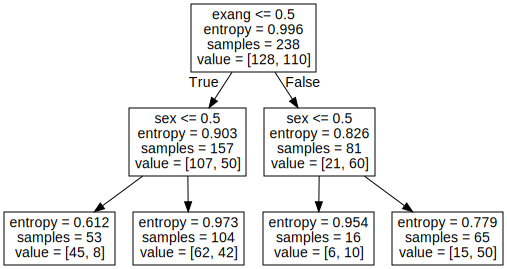

In [ ]:
Source( export_graphviz(clf, out_file=None, feature_names=X_train.columns))

In [ ]:
clf.tree_.children_r

array([ 1,  2, -1, -1,  5, -1, -1], dtype=int64)

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

dt = DecisionTreeClassifier()
#dt.fit(X_train,y_train)

param_grid =  {'min_samples_split':range(2, 10), \
               'max_depth':range(1, 10), \
               'min_samples_leaf':range(1, 10)}

search = RandomizedSearchCV(dt, param_grid)

search.fit(X, y)

best_tree = search.best_estimator_

In [ ]:
search.best_params_

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [ ]:
search.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [ ]:
res = pd.DataFrame(search.cv_results_)
res = res.loc[:,~res.columns.str.endswith("time")]
res = res.loc[:,~res.columns.str.startswith("split")]
res.drop(columns=["params"], inplace=True)

In [ ]:
res.sort_values(by="rank_test_score").head(20)


,param_max_depth,param_min_samples_leaf,param_min_samples_split,mean_test_score,std_test_score,rank_test_score
151,3,1,9,0.973333,0.024944,1
149,3,1,7,0.973333,0.024944,1
148,3,1,6,0.973333,0.024944,1
144,3,1,2,0.973333,0.024944,1
146,3,1,4,0.973333,0.024944,1
581,9,1,7,0.966667,0.021082,6
365,6,1,7,0.966667,0.021082,6
439,7,1,9,0.966667,0.021082,6
438,7,1,8,0.966667,0.021082,6
437,7,1,7,0.966667,0.021082,6


In [ ]:
res.query("rank_test_score<3")

,param_max_depth,param_min_samples_leaf,param_min_samples_split,mean_test_score,std_test_score,rank_test_score
144,3,1,2,0.973333,0.024944,1
146,3,1,4,0.973333,0.024944,1
148,3,1,6,0.973333,0.024944,1
149,3,1,7,0.973333,0.024944,1
151,3,1,9,0.973333,0.024944,1


##RandomForestClassifier

In [ ]:
np.random.seed(0)

Скачиваем набор

In [ ]:
url = "https://raw.githubusercontent.com/sanyathisside/Predicting-Heart-Disease-using-Machine-Learning/master/heart-disease.csv"

df = pd.read_csv(url)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Разбиваем на X и y

In [ ]:
X_train = df.drop(columns="target")
y_train = df["target"]

In [ ]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
y_train.head()

,target
0,1
1,1
2,1
3,1
4,1


Обучим лес

In [ ]:
rf_clf = RandomForestClassifier(10, max_depth=5)

In [ ]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10)

<Axes: >

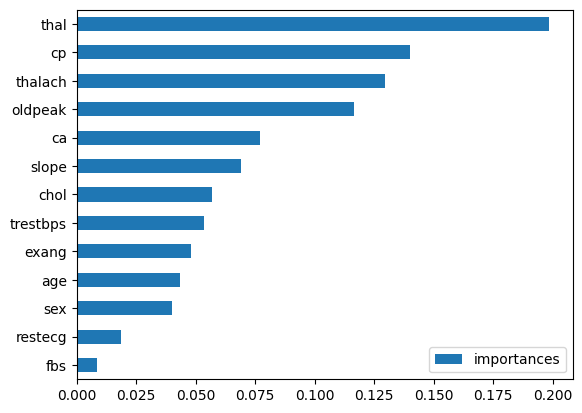

In [ ]:
feature_importances_df = pd.DataFrame({"name": X_train.columns,
                                       "importances": rf_clf.feature_importances_}, index=X_train.columns)

feature_importances_df.sort_values("importances").plot(kind='barh')

### Задачи

#### [1](https://stepik.org/lesson/209695/step/13?unit=183199)

**Задание**: Воспользуемся [данными о сердечных заболеваниях](https://www.kaggle.com/ronitf/heart-disease-uci) и обучим на них Random Forest. Постройте график важности переменных для классификации и выберите среди предложенных вариантов наиболее похожий.

В задании присутствует рандом, прогоните обучение случайного леса и построение графика несколько раз, чтобы увидеть изменения в важности фичей (5 самых важных обычно присутствуют в топе, просто в разном порядке).
Чтобы получить такой же график, как в правильном варианте ответа, сделайте

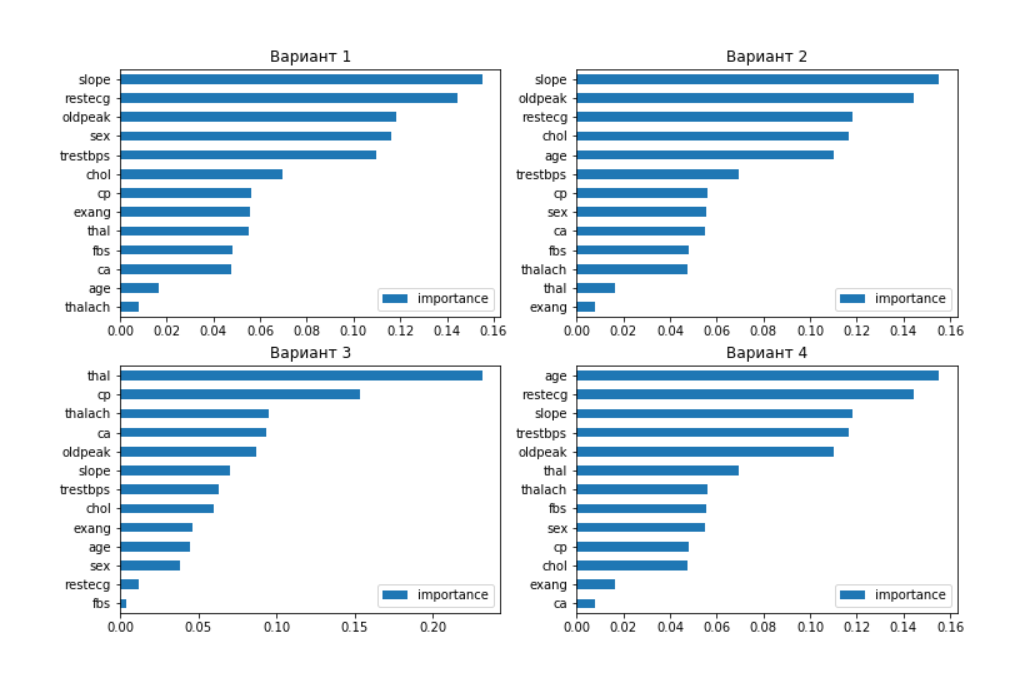

In [ ]:
data = pd.read_csv("https://stepik.org/media/attachments/course/4852/training_mush.csv")
data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [ ]:
X_train = data.drop(columns="class")
y_train = data["class"]

In [ ]:
rf = RandomForestClassifier(random_state=0)

In [ ]:
param = {"n_estimators": range(10,51,10),
         "max_depth": range(1,13,2),
         "min_samples_leaf": range(1,8),
         "min_samples_split": range(2,10,2)
         }

In [ ]:
search = GridSearchCV(rf, param, cv=3, n_jobs=-1, verbose=1)

In [ ]:
search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 51, 10)})

In [ ]:
search.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [ ]:
best_rf = search.best_estimator_
feature_importances = best_rf.feature_importances_

<Axes: >

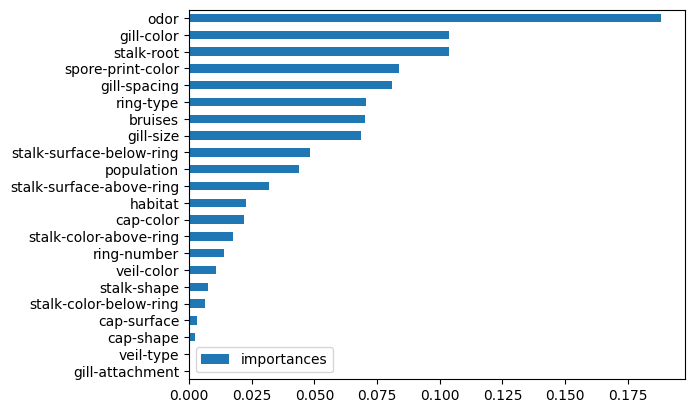

In [ ]:
feature_imp_df = pd.DataFrame({"importances": best_rf.feature_importances_}, index=X_train.columns)
feature_imp_df.sort_values("importances").plot(kind="barh")

#### 2

**Задание**: Теперь у нас есть классификатор, определяющий какие грибы съедобные, а какие нет, испробуем его! Предскажите съедобность этих данных [грибов](https://stepik.org/media/attachments/course/4852/testing_mush.csv) и напишите в ответ число несъедобных грибов (класс равен 1).



Заметьте, что для использования этого леса на новых грибах, нам нужно будет заполнить значения параметров гриба, часть из которых определить проще (например, цвет шляпки), а для определения части понадобится специалист-миколог.
То есть в этом случае нам придётся самим экстрагировать признаки из объекта. Для зрительных признаков типа формы, цвета можно использовать более сложную модель (например, свёрточную нейронную сеть) и подавать на вход фотки гриба. И модель сама извлечёт признаки вместо того, чтобы нам описывать самим. Но одной фоткой тут не отделаешься - для определения запаха понадобится ещё детектор

In [ ]:
X_test = pd.read_csv("https://stepik.org/media/attachments/course/4852/testing_mush.csv")
X_test.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4


In [ ]:
predict_df = pd.DataFrame({"etable": best_rf.predict(X_test)})
predict_df.head()

,etable
0,0
1,0
2,1
3,1
4,1


In [ ]:
predict_df.value_counts()

,count
etable,
0,1055
1,976


**Задание**: Создайте confusion matrix по предсказаниям, полученным вами в прошлом уроке и правильным ответам, (воспользуйтесь паролем из предыдущего задания, чтобы открыть их). Выберите из предложенных вариантов правильный

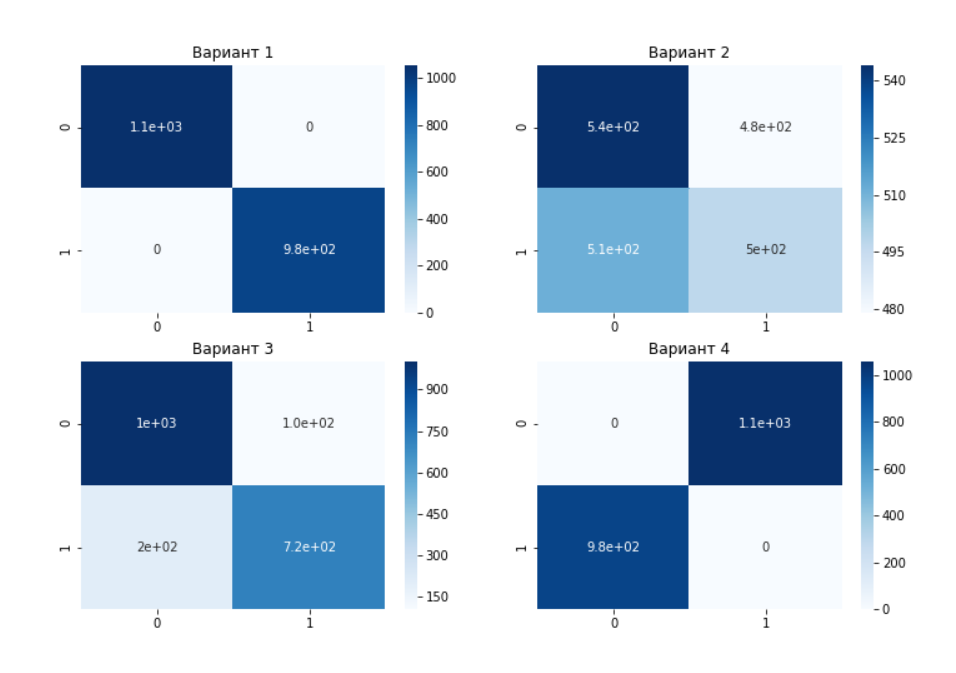

In [ ]:
y_test = pd.read_csv("/content/testing_y_mush.csv")
y_test.head()

,class
0,0
1,0
2,1
3,1
4,1


<Axes: >

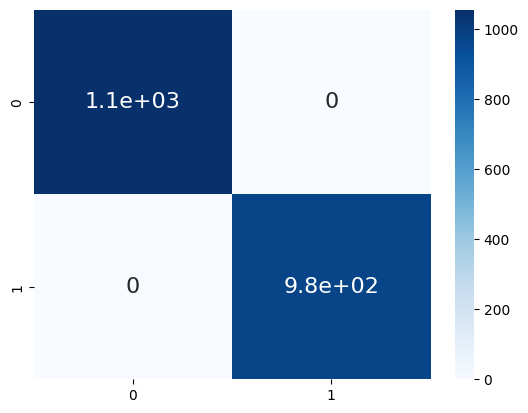

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mtx = confusion_matrix(y_test, predict_df.values)
sns.heatmap(conf_mtx, annot=True,annot_kws={"size": 16}, cmap="Blues")

#### 3

**Задание**: Перейдём к следующему [датасэту](https://stepik.org/media/attachments/course/4852/invasion.csv).

На Землю нападают войска жукеров, и в их флоте присутствуют транспортники, истребители и крейсеры. Для борьбы с каждым типом кораблей используется свой вид оружия. Как аналитику из Штаба Обороны, вам поручено разработать модель, предсказывающую какие корабли участвуют в атаке, чтобы успешно отбить нападения на различные области планеты

Данных удалось собрать немного, и предсказывать придётся гораздо больший по объёму массив.

Обучите модель и предскажите классы кораблей для [новых поступающих данных](https://stepik.org/media/attachments/course/4852/operative_information.csv). Укажите в ответе через пробел число крейсеров, транспортников и истребителей.

От вашего ответа зависит судьба человечества!

In [ ]:
data = pd.read_csv("https://stepik.org/media/attachments/course/4852/invasion.csv")
data.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [ ]:
data.shape

(500, 7)

In [ ]:
data["class"].unique()

array(['transport', 'fighter', 'cruiser'], dtype=object)

In [ ]:
X_train = data.drop(columns="class")
y_train = data["class"]

In [ ]:
X_test =  pd.read_csv("https://stepik.org/media/attachments/course/4852/operative_information.csv")
X_test.head()

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,7.516543,3.916691,513.954279,0.177247,105908,13.267224
1,4.322988,6.967689,63.752970,0.545922,277855,39.833130
2,4.595724,9.098297,62.233948,0.389201,160662,42.014556
3,2.689675,7.964869,62.475495,0.541081,162092,42.056829
4,8.075576,5.169719,336.441261,0.174757,466853,11.779813


Сохдаем случайный лес

In [ ]:
rf = RandomForestClassifier()

search = RandomizedSearchCV(rf, param, verbose=1)

In [ ]:
search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': range(1, 13, 2),
                                        'min_samples_leaf': range(1, 8),
                                        'min_samples_split': range(2, 10, 2),
                                        'n_estimators': range(10, 51, 10)},
                   verbose=1)

In [ ]:
search.best_params_

{'n_estimators': 40,
 'min_samples_split': 8,
 'min_samples_leaf': 2,
 'max_depth': 9}

In [ ]:
best_rf = search.best_estimator_

In [ ]:
y_pred = best_rf.predict(X_test)

In [ ]:
pd.Series(y_pred).value_counts()

,count
fighter,675
transport,595
cruiser,230


In [ ]:
feature_imp_df = pd.Series(best_rf.feature_importances_, index=X_train.columns)
feature_imp_df.sort_values()

,0
time_of_observance,0.000000
i_reflection,0.038483
speed,0.130971
g_reflection,0.137207
brightness,0.330301
volume,0.363038


In [ ]:
data3 = pd.read_csv("https://stepik.org/media/attachments/course/4852/space_can_be_a_dangerous_place.csv")

In [ ]:
data3.corr().dangerous.sort_values()

,dangerous
dustiness,-0.000499
phi,0.003035
peradventure_index,0.005788
r,0.005788
black_hole_is_near,0.052968
nearby_system_has_planemo,0.299508
buggers_were_noticed,0.344469
dangerous,1.000000


In [ ]:
df = pd.DataFrame(range(10000000))

%time df.apply(np.mean)

%time df.apply('mean')

%time df.describe().loc['mean']

%time df.mean(axis=0)

CPU times: user 22.7 ms, sys: 45 µs, total: 22.8 ms
Wall time: 27.9 ms
CPU times: user 23.3 ms, sys: 0 ns, total: 23.3 ms
Wall time: 25.6 ms
CPU times: user 231 ms, sys: 107 ms, total: 338 ms
Wall time: 490 ms
CPU times: user 22.5 ms, sys: 175 µs, total: 22.6 ms
Wall time: 21.3 ms


,0
0,4999999.5


In [ ]:
%%time

df = pd.DataFrame(range(10000000))

df.apply(np.mean)


CPU times: user 32 ms, sys: 33.6 ms, total: 65.5 ms
Wall time: 71.9 ms


,0
0,4999999.5
